In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
sns.set_theme(style="darkgrid")


# Importation


In [2]:
dataset_list = [
    'olist_order_reviews_dataset.csv.zip',
    'olist_customers_dataset.csv.zip',
    'olist_geolocation_dataset.csv.zip',
    'olist_order_items_dataset.csv.zip',
    'olist_order_payments_dataset.csv.zip'  ,
    'olist_orders_dataset.csv.zip',
    'olist_products_dataset.csv.zip',
    'olist_sellers_dataset.csv',
    'product_category_name_translation.csv'
]

data_name_list = [
    'order_reviews',
    'customers',
    'geolocalisation',
    'order_items',
    'order_payments',
    'orders',
    'products',
    'sellers',
    'translation'
]

data =   {key : pd.read_csv(path) for key, path in zip(data_name_list, dataset_list)}

In [4]:
# Prix + fais de livraison
data['order_items']['price'] = data['order_items']['price'] + data['order_items']['freight_value']

# Agrégation : Somme des prix par order_id
order = data['order_items'].groupby('order_id')['price'].sum().to_frame().reset_index()
order.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [6]:
order_2 = order.merge(
    data['orders'], on ='order_id', how='left')[
    ['order_id',
     'price',
     'customer_id',
     'order_delivered_customer_date',
       ]]

In [7]:
order_2.head()

,order_id,price,customer_id,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31


In [8]:
order_3 = order_2.merge(data['customers'][['customer_id','customer_unique_id']],on='customer_id',how='left')
order_3.head()

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5


In [9]:
review_2 =  data['order_reviews'].groupby('order_id')['review_score'].mean().to_frame().reset_index()
review_2.head()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [10]:
order_4 = order_3.merge(review_2,on='order_id', how='left')
order_4.head()

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,5.0
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,4.0
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,5.0
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,5.0


In [11]:
order_4['order_delivered_customer_date'] = pd.to_datetime(order_4['order_delivered_customer_date']).astype('datetime64[D]')

order_4['nb_days'] = (datetime.now() - order_4['order_delivered_customer_date']).astype('timedelta64[D]')

order_4 = order_4.dropna()

In [52]:
order_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95830 entries, 0 to 98665
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95830 non-null  object        
 1   price                          95830 non-null  float64       
 2   customer_id                    95830 non-null  object        
 3   order_delivered_customer_date  95830 non-null  datetime64[ns]
 4   customer_unique_id             95830 non-null  object        
 5   review_score                   95830 non-null  float64       
 6   nb_days                        95830 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 5.8+ MB


In [13]:
order_4.isna().mean()

order_id                         0.0
price                            0.0
customer_id                      0.0
order_delivered_customer_date    0.0
customer_unique_id               0.0
review_score                     0.0
nb_days                          0.0
dtype: float64

# Fonction RFM

In [21]:
def fonction_rfm (data):
    
    rfm = data.groupby('customer_unique_id').agg({'nb_days' : np.min, # minimum soit le dernier achat 
                                      'order_delivered_customer_date' : len, # fréquence
                                      'price' : np.sum, # Somme des montants des achats
                                      'review_score'  : np.mean    # Moyenne des notes clients
                                     }).reset_index()

    rfm = rfm.rename(columns={'nb_days' : 'r', # récence
            'order_delivered_customer_date' : 'f', # fréquence
            'price' : 'm' }) # montant
    
    rfm = rfm.dropna() # Suppression des NA
    
    # Score par quantile
#     rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0'])#.astype('str')

#     rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2'])#.astype('str')

#     rfm['mq'] = pd.cut(rfm.m,bins=np.quantile(rfm.m, q = [0,0.33,0.66,1]),labels=['0','1','2'])#.astype('str')

    # Format string pour les sommer 

#     rfm[['rq','fq','mq']] =  rfm[['rq','fq','mq']].astype('str')

    # rfm['rq'] = rfm['rq'].astype('str')
    # rfm['fq'] = rfm['fq'].astype('str')
    # rfm['mq'] = rfm['mq'].astype('str')

    # Passage en log 
    rfm['log_r'] = np.log(rfm.r)
    rfm['log_f'] = np.log(rfm.f)
    rfm['log_m'] = np.log(rfm.m)


    # Score composite
#     rfm['score'] = rfm['rq'] + rfm['fq'] + rfm['mq']
    
    
    return rfm
    

In [22]:
# Test fonction rfm
rfm = fonction_rfm(order_4)
rfm

,customer_unique_id,r,f,m,review_score,log_r,log_f,log_m
0,0000366f3b9a7992bf8c76cfdf3221e2,1832.0,1,141.90,5.0,7.513164,0.0,4.955123
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1838.0,1,27.19,4.0,7.516433,0.0,3.302849
2,0000f46a3911fa3c0805444483337064,2238.0,1,86.22,3.0,7.713338,0.0,4.456902
3,0000f6ccb0745a6a4b88665a16c9f078,2028.0,1,43.62,4.0,7.614805,0.0,3.775516
4,0004aac84e0df4da2b147fca70cf8255,2002.0,1,196.89,5.0,7.601902,0.0,5.282645
...,...,...,...,...,...,...,...,...
92748,fffcf5a5ff07b0908bd4e2dbc735a684,2146.0,1,2067.42,5.0,7.671361,0.0,7.634057
92749,fffea47cd6d3cc0a88bd621562a9d061,1959.0,1,84.58,4.0,7.580189,0.0,4.437698
92750,ffff371b4d645b6ecea244b27531430a,2280.0,1,112.46,5.0,7.731931,0.0,4.722598
92751,ffff5962728ec6157033ef9805bacc48,1834.0,1,133.69,5.0,7.514255,0.0,4.895524


# Fonction K means

In [23]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.metrics.cluster import adjusted_rand_score

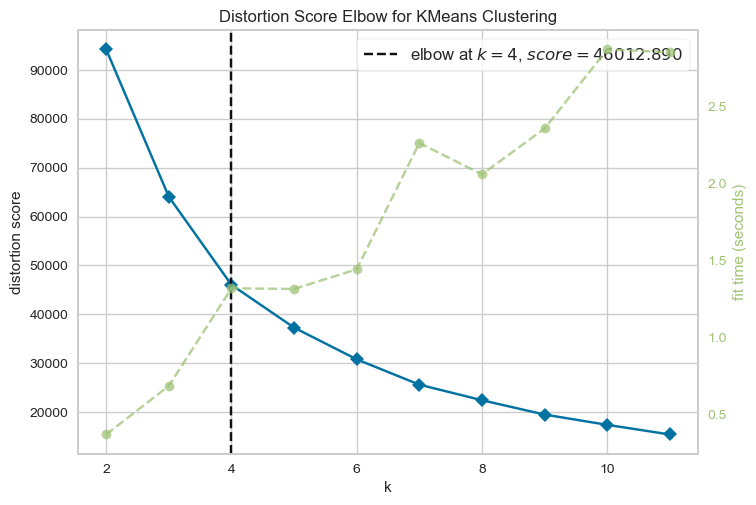

In [24]:
# Instantiate the clustering model and visualizer
model = KMeans()

X = np.array(rfm[['log_r','log_f','log_m','review_score']])

visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

In [25]:
def cluster_kmeans(rfm = rfm , k=5):
    
    # Features : la version log rfm
    X = np.array(rfm[['log_r','log_f','log_m','review_score']])
    
    # Model Kmeans défaut k = 5 
    model = KMeans(n_clusters = k, random_state=1990).fit(X)
    y_pred = model.predict(X)
    
    return y_pred 

In [26]:
y_pred  = cluster_kmeans(rfm,5)

In [27]:
rfm['cluster'] = y_pred

In [28]:
rfm['cluster'].value_counts()

2    27387
0    22966
3    20578
1    11816
4    10006
Name: cluster, dtype: int64

# ARI

In [29]:
pd.date_range(start='2/2/2019', end='2/08/2020', freq = "M")


DatetimeIndex(['2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', freq='M')

In [30]:
df = order_4.copy()

df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'] )

In [31]:
print('Date de début : ',df['order_delivered_customer_date'].min()) 
print('Date de fin : ',df['order_delivered_customer_date'].max()) 

Date de début :  2016-10-11 00:00:00
Date de fin :  2018-10-17 00:00:00


## Baseline 
    1ère année comme référence 
    Teste ARI sur différentes périodes (mois) sur la deuxième année 

In [32]:
# 1ere année
start_date = pd.to_datetime('10/11/2016') # M J Y
end_date = pd.to_datetime('10/11/2017')

# Dernière date dans nos données 
final_date = pd.to_datetime('10/17/2018')


baseline = df.loc[(df['order_delivered_customer_date'] > start_date) &
                  (df['order_delivered_customer_date'] < end_date)].copy()

baseline.shape

(26037, 7)

### Test 1 semaine
    Baseline prédict ==> s1

In [33]:
pd.date_range(start=end_date, freq = "W", periods = 1)[0]

Timestamp('2017-10-15 00:00:00', freq='W-SUN')

In [34]:
t1 = pd.to_datetime('10/18/2017')

s1 = df.loc[(df['order_delivered_customer_date'] > end_date) &
       (df['order_delivered_customer_date'] < t1)]

test = df.loc[
       (df['order_delivered_customer_date'] < t1)]

#s1

In [35]:
df.shape

(95830, 7)

In [36]:
rfm_baseline = fonction_rfm(baseline)
#rfm_s1 = fonction_rfm(s1)
rfm_test = fonction_rfm(test)

#rfm_baseline.merge(rfm_s1)
#rfm['cluster'] = cluster_kmeans(rfm_baseline)
#rfm_baseline

In [37]:
test.shape,baseline.shape,s1.shape

((26951, 7), (26037, 7), (720, 7))

In [38]:
cluster_kmeans(rfm_baseline)

array([2, 2, 2, ..., 3, 0, 4])

In [39]:
s1.shape

(720, 7)

In [40]:
#cluster_kmeans_predict(rfm,rfm_s1)

rfm_baseline = fonction_rfm(baseline)
#rfm_s1 = fonction_rfm(s1)
rfm_test = fonction_rfm(test)

In [41]:

def cluster_kmeans_predict(rfm = rfm_baseline ,s1 = rfm_test , k=5):
    
    # Features : la version log rfm + review
    #features = ['log_r','log_f','log_m','review_score']
    
    features = ['r','f','m','review_score']
    
    X_baseline = np.array(rfm[features]) # t0
    
    X_test = np.array(s1[features]) # t+1
    
    
    # Model Kmeans défaut k = 5 
    
    # 1. On entraine la baseline 
    model = KMeans(n_clusters = k, random_state=1990).fit(X_baseline)
    

    # 2. Prédiction sur t+1
    pred_s1 = model.predict(X_test)
    
    # 3. fit & prediction sur t+1
    
    model2 = KMeans(n_clusters = k, random_state=1990).fit(X_test)
    
    pred_test = model2.predict(X_test)
    
    
    
    print(adjusted_rand_score(pred_test, pred_s1))
    
    result = (adjusted_rand_score(pred_s1, pred_test))
    
    return result

In [42]:
# pred_test,pred_s1

In [43]:
cluster_kmeans_predict(rfm_baseline,rfm_test)

0.23616579274738728


0.23616579274738728

### Test mois

In [44]:
final_date, end_date

(Timestamp('2018-10-17 00:00:00'), Timestamp('2017-10-11 00:00:00'))

In [45]:
pd.date_range(start=end_date, freq = "M", end = final_date)

DatetimeIndex(['2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30'],
              dtype='datetime64[ns]', freq='M')

In [46]:
futur_mois = pd.date_range(start=end_date, freq = "15D", end = final_date)
futur_mois

DatetimeIndex(['2017-10-11', '2017-10-26', '2017-11-10', '2017-11-25',
               '2017-12-10', '2017-12-25', '2018-01-09', '2018-01-24',
               '2018-02-08', '2018-02-23', '2018-03-10', '2018-03-25',
               '2018-04-09', '2018-04-24', '2018-05-09', '2018-05-24',
               '2018-06-08', '2018-06-23', '2018-07-08', '2018-07-23',
               '2018-08-07', '2018-08-22', '2018-09-06', '2018-09-21',
               '2018-10-06'],
              dtype='datetime64[ns]', freq='15D')

In [47]:
res = []

for t in futur_mois:

    testing = df.loc[(df['order_delivered_customer_date'] < t)]
    
    # fonction rfm
    
    rfm_testing = fonction_rfm(testing)
        
    res.append(cluster_kmeans_predict(rfm_baseline,rfm_testing,k=5))
    
    print(rfm_baseline.shape,rfm_testing.shape)
    


0.999800517829632
(25305, 8) (25307, 8)
0.2399163143100465
(25305, 8) (27470, 8)
0.2456931249316757
(25305, 8) (29447, 8)
0.7152895155493951
(25305, 8) (31591, 8)
0.6911942105930391
(25305, 8) (34836, 8)
0.6200721266781403
(25305, 8) (38418, 8)
0.5451125939144437
(25305, 8) (40985, 8)
0.5138225281383395
(25305, 8) (44099, 8)
0.5059681573901372
(25305, 8) (47488, 8)
0.5015873478108188
(25305, 8) (50330, 8)
0.49089225736394637
(25305, 8) (53602, 8)
0.4773485698742036
(25305, 8) (56722, 8)
0.4441373494948403
(25305, 8) (60082, 8)
0.45757103805524024
(25305, 8) (63926, 8)
0.4042262204706068
(25305, 8) (67692, 8)
0.3969030720208367
(25305, 8) (71855, 8)
0.40173288613503366
(25305, 8) (74116, 8)
0.40229175274906526
(25305, 8) (77522, 8)
0.38427418918427775
(25305, 8) (80434, 8)
0.384017141272761
(25305, 8) (82228, 8)
0.39443100852530394
(25305, 8) (85956, 8)
0.3704811609238461
(25305, 8) (90023, 8)
0.323252578911371
(25305, 8) (92726, 8)
0.3323990991486437
(25305, 8) (92746, 8)
0.33352050602

[]

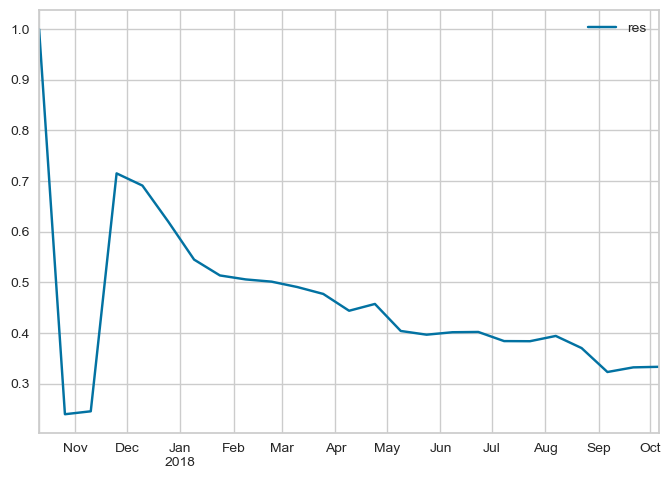

In [48]:
pd.DataFrame({'res' : res }, index = futur_mois).plot()
plt.plot()

## Regardons de plus près 
    De t0 à décembre 2017

In [49]:
decembre_2017 = pd.to_datetime('01/01/2018') 

futur_mois = pd.date_range(start=end_date, freq = "10D", end = decembre_2017)
futur_mois


res = []

for t in futur_mois:

    testing = df.loc[(df['order_delivered_customer_date'] < t)]
    
    # fonction rfm
    
    rfm_testing = fonction_rfm(testing)
        
    res.append(cluster_kmeans_predict(rfm_baseline,rfm_testing,k=5))
    
    print(rfm_baseline.shape,rfm_testing.shape)
    


0.999800517829632
(25305, 8) (25307, 8)
0.23947803562299413
(25305, 8) (26756, 8)
0.24127485452372022
(25305, 8) (28059, 8)
0.2456931249316757
(25305, 8) (29447, 8)
0.7381880606542256
(25305, 8) (30494, 8)
0.7339711499449582
(25305, 8) (32483, 8)
0.6911942105930391
(25305, 8) (34836, 8)
0.6212014501784471
(25305, 8) (37424, 8)
0.5840676494224137
(25305, 8) (39602, 8)


In [50]:
futur_mois

DatetimeIndex(['2017-10-11', '2017-10-21', '2017-10-31', '2017-11-10',
               '2017-11-20', '2017-11-30', '2017-12-10', '2017-12-20',
               '2017-12-30'],
              dtype='datetime64[ns]', freq='10D')

[]

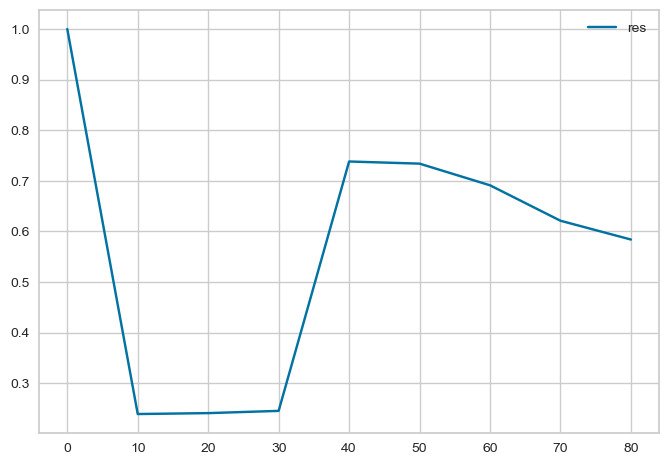

In [51]:
pd.DataFrame({'res' : res }, index = (futur_mois - end_date).astype('timedelta64[D]')).plot()
plt.plot()